# প্রজেক্ট ৩ঃ ডায়াবেটিস ডেটাসেট রিগ্রেশন প্রবলেম



মেশিন লার্নিং প্রজেক্ট চেকলিস্ট দেখা  যাক - 

১) প্রবলেম ডেফিনেশন ( প্রবলেম ও ডেটাসেট সম্পর্কে বিস্তারিত জানা) 

২) ডেটাসেট লোড করা। 

৩) এনালাইজ ডেটা (ডেসক্রিপ্টিভ স্ট্যাটিস্টিক্স ও ডেটা ভিজ্যুয়ালাইজেশন ) 

৪) ভ্যালিডেশন ডেটা সেট (ডেটাসেটকে স্প্লিট করা)

৫) ইভ্যালুয়েট এলগরিফদম ( ডেটাকে প্রিপ্রসের না করে) 

৬) ইভ্যালুয়েট এলগরিফদম ( ডেটাকে প্রিপ্রসের করে)

৭) ইম্প্রুভ রেজাল্ট  ( প্যারামিটার টিউনিং করে) 

৮) এনস্যাম্বল মেথড ব্যবহার করে মডেলের এক্যুরেসি বাড়ানো

৯) টিউনিং এনস্যাম্বল মেথড। 

১০) ফাইনালাইজ মডেল। 

In [1]:
# Load libraries

# for load dataset
import numpy as np
from numpy import arange
import pandas as pd
from pandas import set_option
from sklearn import datasets

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

# data preparation and evaluation model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Machine learning algorithm and pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

# Ensemble model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
# load dataset
diabetes = datasets.load_diabetes()


In [7]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [8]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [53]:
dataset = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [11]:
dataset.shape

(442, 10)

In [12]:
dataset.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [21]:
dataset.head(20)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [22]:
dataset.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [31]:
dataset.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


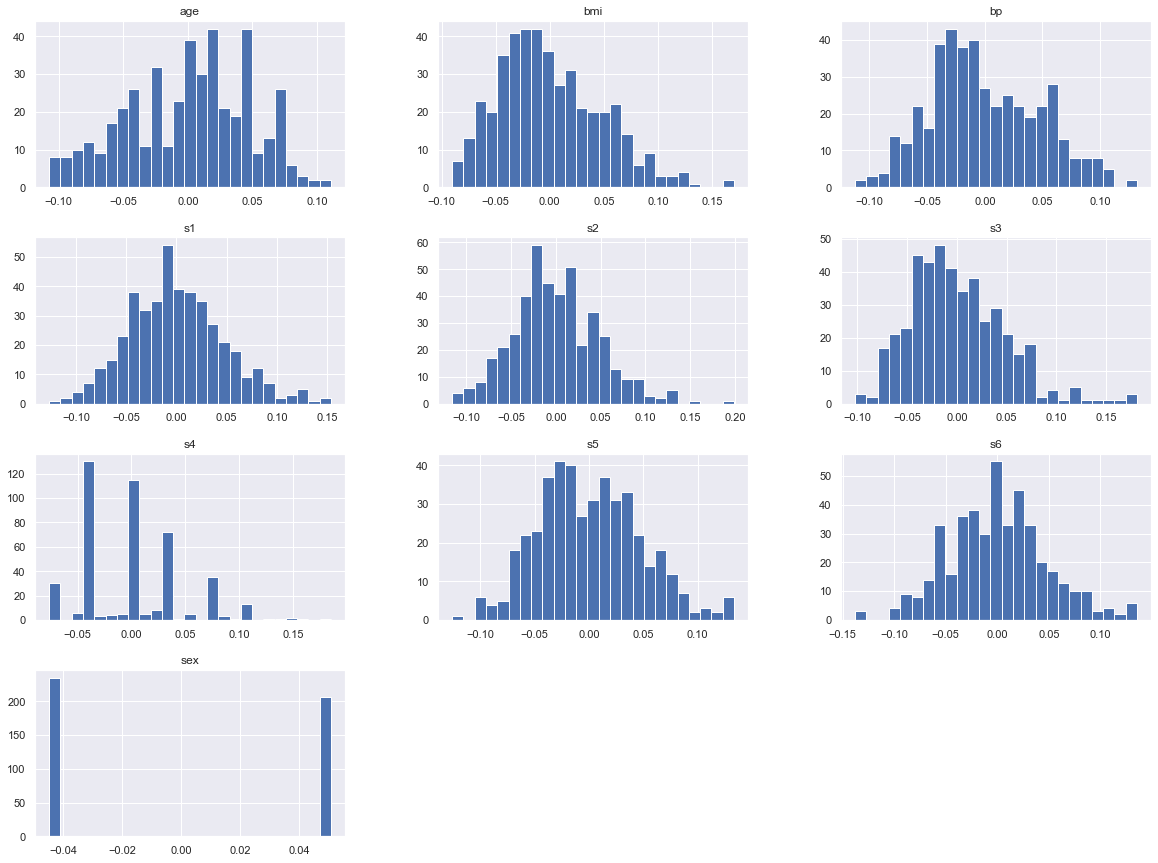

In [23]:
# Histogram plots
sns.set(style='darkgrid')
dataset.hist(bins=25, figsize = (20, 15))
plt.show()

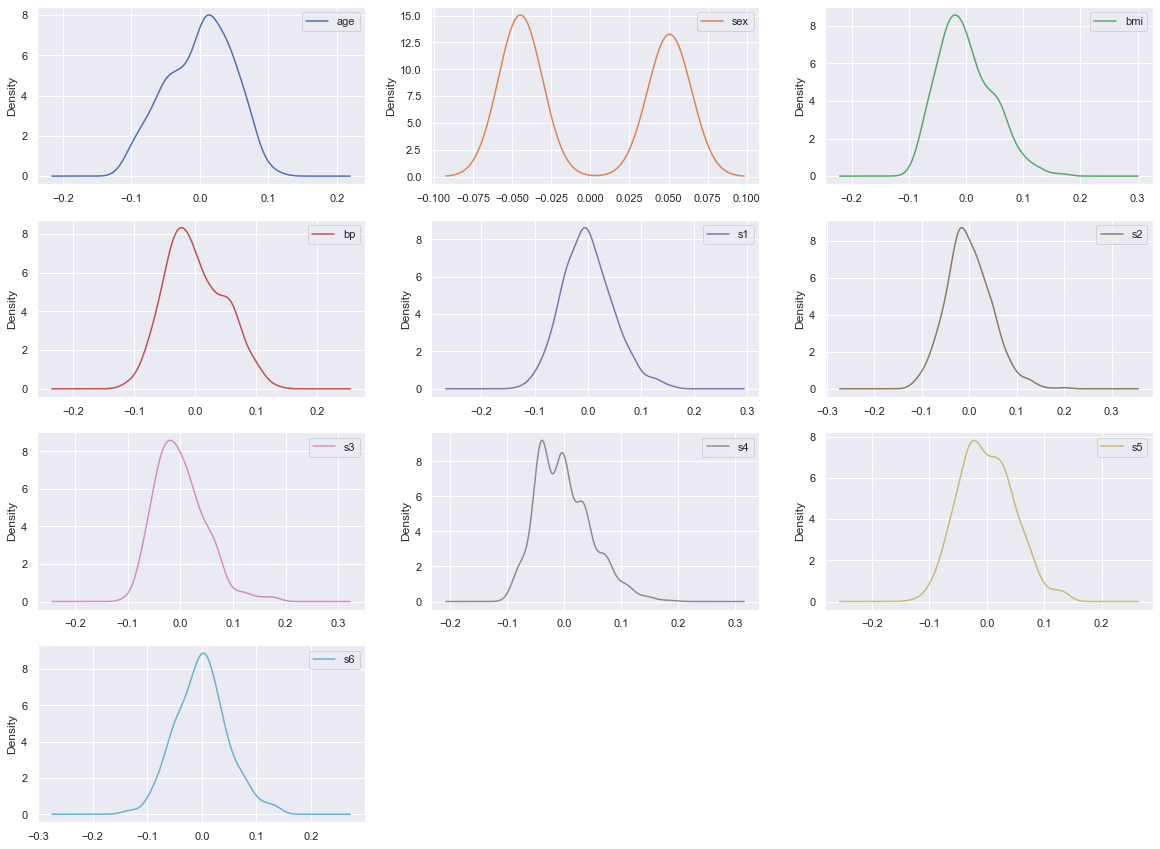

In [26]:
# Density Plot
dataset.plot(kind='kde', subplots=True, layout=(4,3), sharex=False, figsize=(20, 15))
plt.show()

In [29]:
# Box and whisker plot
fig = dataset.iplot(asFigure=True, kind="box")
fig.show()

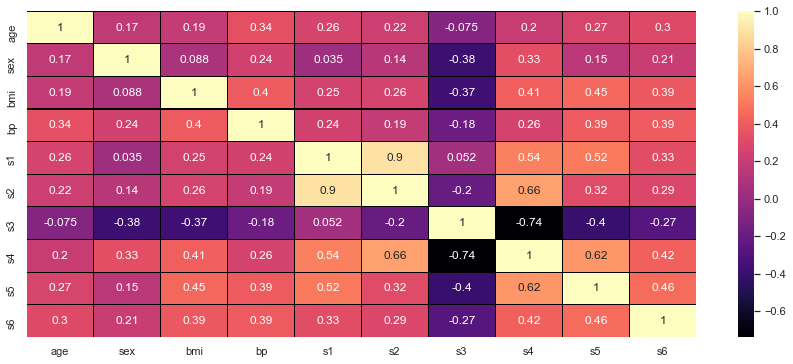

In [78]:
# Correlation heatmap
corr = dataset.corr()
fig = plt.figure(figsize=(15,6))
sns.heatmap(corr, linecolor='black', linewidths=.1, annot=True, cmap='magma')

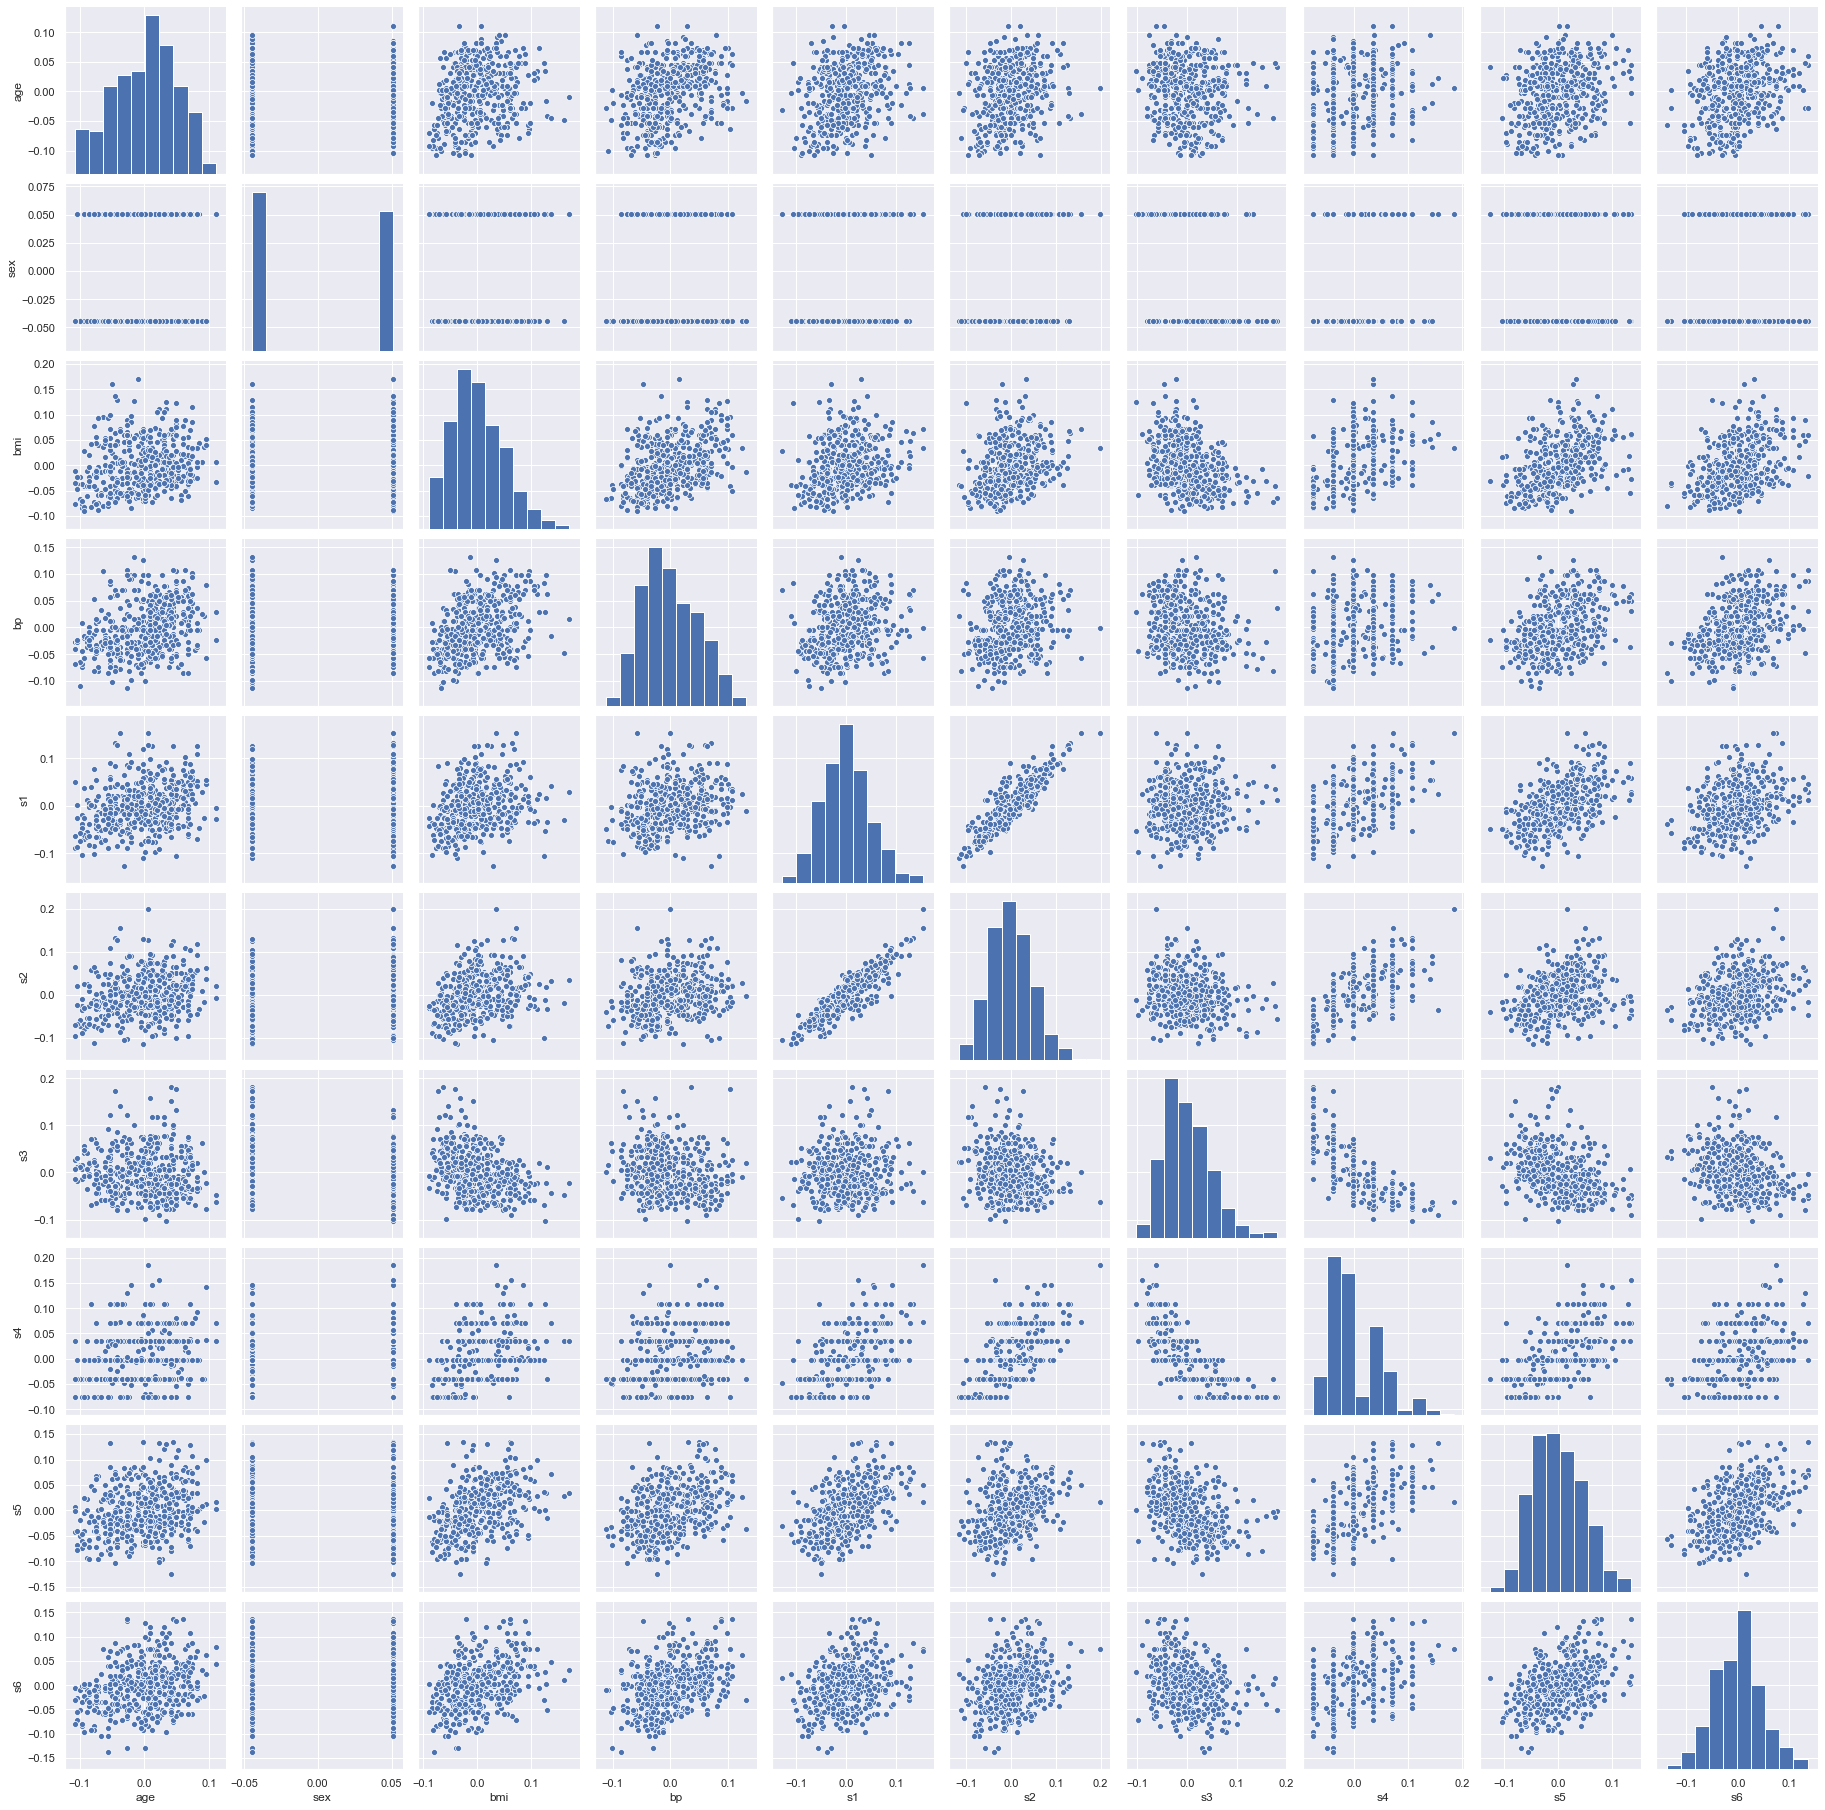

In [32]:
# Scatter matrix
sns.pairplot(data=dataset)

In [70]:
from sklearn.decomposition import PCA
X = diabetes.data
Y = diabetes.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=7)
# feature extraction
pca = PCA(n_components=9)
pca.fit(X_train)
X_train = pca.transform(X_train)


In [68]:
print(X_train.shape)
print(X_test.shape)

(353, 9)
(89, 10)


In [69]:
# train test split
array  = dataset1.values
X = array[:, :]
Y = diabetes.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=7)

In [71]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'r2'

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Rescale', MinMaxScaler()), ('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Rescale', MinMaxScaler()),('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Rescale', MinMaxScaler()),('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Rescale', MinMaxScaler()),('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Rescale', MinMaxScaler()),('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Rescale', MinMaxScaler()),('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

ScaledLR: 47.741181 (0.124076)
ScaledLASSO: 47.940109 (0.120001)
ScaledEN: 42.622061 (0.070258)
ScaledKNN: 35.064360 (0.140887)
ScaledCART: -2.066607 (0.219546)
ScaledSVR: 4.689385 (0.073448)


In [72]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)


LR: 47.741181 (0.124076)
LASSO: 31.359341 (0.072893)
EN: -2.670460 (0.037249)
KNN: 42.301408 (0.096967)
CART: 0.064952 (0.180507)
SVR: 12.110041 (0.079909)


In [74]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)


ScaledAB: 45.655569 (0.114342)
ScaledGBM: 45.215576 (0.138457)
ScaledRF: 48.939414 (0.105974)
ScaledET: 49.515992 (0.119731)


In [75]:
# Tune scaled ET
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(("%f (%f) with: %r") % (mean*100, stdev, param))

Best: 0.475910 using {'n_estimators': 250}
45.499752 (0.178659) with: {'n_estimators': 50}
46.368860 (0.180999) with: {'n_estimators': 100}
46.875755 (0.177339) with: {'n_estimators': 150}
47.463048 (0.170463) with: {'n_estimators': 200}
47.590961 (0.164776) with: {'n_estimators': 250}
47.479631 (0.167518) with: {'n_estimators': 300}
47.451089 (0.167244) with: {'n_estimators': 350}
47.408899 (0.169207) with: {'n_estimators': 400}


In [77]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(random_state=seed, n_estimators=250)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print("Model accuracy (r2 matrix): %.3f%%" % (r2_score(Y_test, predictions)*100))

ValueError: operands could not be broadcast together with shapes (89,10) (9,) (89,10) 